# <span style="font-size:24px;">Métodos Numéricos con Python</span>

<span style="font-size:24px;">
Outline Course:
</span>

- <span style="font-size:24px;">Errores en Calculos Numéricos</span>
- <span style="font-size:24px;">Sistemas de Ecuaciones Lineales</span>
- <span style="font-size:24px;">Solución de Ecuaciones No Lineales</span>
- <span style="font-size:24px;">Interpolación y Aproximación</span>
- <span style="font-size:24px;">Diferenciación Numérica</span>
- <span style="font-size:24px;">Integración Numérica</span>
- <span style="font-size:24px;">Ecuaciones Diferenciales Ordinarias</span>
- <span style="font-size:24px;">Ecuaciones Diferenciales Parciales</span>


<span style="font-size:24px;">
Requisitos Minimos Previos:
</span>

- <span style="font-size:24px;">Programacion basica en python</span>
- <span style="font-size:24px;">Haber llevado un curso de Algebra Lineal</span>
- <span style="font-size:24px;">Haber llevado un curso de Calculo Diferencial e Integral</span>

<span style="font-size:24px;">BIBLIOGRAFIA</span>
<img src="images/numericalrecipes.jpg">

# <span style="font-size:24px;">Precision y Exactitud</span>

<span style="font-size:24px;">
Cuando realizamos cálculos numéricos, es importante tener en cuenta la precisión y exactitud de los resultados. A continuacion vamos a entender la diferencia entre ambos conceptos.
</span>

![Precision y Exactitud](images/precisionyexactitud.jpg)


# <span style="font-size:24px;">Errores en Cálculos Numéricos</span>

<span style="font-size:24px;">
A menudo en los algoritmos, nos encontramos con errores de redondeo, truncamiento, etc., que pueden afectar el resultado final. 
</span>


In [93]:
# Importar librerias
import math
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Errores en valores exactos
valor_exacto = 1 / 3
valor_aproximado = 0.3333333333
error_absoluto = abs(valor_exacto - valor_aproximado)
print("Error absoluto: ", error_absoluto)

Error absoluto:  3.33333360913457e-11


In [95]:
# Errores de redondeo
numero_decimal = 0.123456789
numero_redondeado = round(numero_decimal, 4)
error_absoluto = abs(numero_decimal - numero_redondeado)
print("Error absoluto: ", error_absoluto)

Error absoluto:  4.321100000000133e-05


In [96]:
# Errores de truncamiento
e_aprox = sum(1 / math.factorial(n) for n in range(0, 10))
e_exact = math.e
error_absoluto = abs(e_exact - e_aprox)
print("Error absoluto: ", error_absoluto)

Error absoluto:  3.0288585284310443e-07


# <span style="font-size:24px;">Estabilidad y Convergencia</span>

<span style="font-size:24px;">
De igual forma, en los metodos numericos debemos tener en cuenta la estabilidad y convergencia de los algoritmos.
</span>

In [97]:
# Estabilidad
suma = 0.0
for i in range(10000):
    suma += 0.1
print("Suma acumulada: ", suma)  # ¿Por qué no es 1000?

Suma acumulada:  1000.0000000001588


In [98]:
# Convergencia
def funcion(x):
    return (2 * x + 3) / 5


def metodo_iterativo(x0, tolerancia=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        x_nuevo = funcion(x)
        if abs(x_nuevo - x) < tolerancia:
            return x_nuevo, i  # Converge
        x = x_nuevo
    return None, i  # No converge


resultado, iteraciones = metodo_iterativo(0.0)
print("Resultado: ", resultado, "Iteraciones: ", iteraciones)

Resultado:  0.9999995705032705 Iteraciones:  15


# <span style="font-size:24px;">Sistemas de Ecuaciones Lineales</span>

<span style="font-size:24px;">
Un sistema de ecuaciones lineales es un conjunto de ecuaciones lineales que se expresan de la siguiente forma:
</span>

\begin{align*}
\LARGE ax + by &= \LARGE c \\
\LARGE dx + ey &= \LARGE f
\end{align*}

# <span style="font-size:24px;">Método de Eliminación Gaussiana</span>

<span style="font-size:24px;">
El Método de Eliminación Gaussiana es una técnica algebraica utilizada para resolver sistemas de ecuaciones lineales. Este método transforma el sistema en uno equivalente más sencillo, facilitando encontrar la solución del conjunto de ecuaciones. El proceso consta de dos partes principales: eliminación y sustitución hacia atrás.
</span>

## <span style="font-size:24px;">Proceso de Eliminación</span>

<span style="font-size:24px;">
El objetivo de la eliminación es transformar la matriz de coeficientes del sistema en una matriz triangular superior. Esto se logra mediante operaciones elementales de fila que incluyen:
</span>

- <span style="font-size:24px;">Intercambiar dos filas.</span>
- <span style="font-size:24px;">Multiplicar una fila por un escalar no nulo.</span>
- <span style="font-size:24px;">Sumar o restar un múltiplo escalar de una fila a otra fila.</span>

## <span style="font-size:24px;">Sustitución hacia Atrás</span>

<span style="font-size:24px;">
Una vez que se ha obtenido una matriz triangular superior, se procede a realizar la sustitución hacia atrás. Esto implica resolver las ecuaciones desde la última hasta la primera, progresivamente sustituyendo las variables ya resueltas.
</span>

## <span style="font-size:24px;">Solucion Matricial</span>

<span style="font-size:24px;">
El método de Eliminación Gaussiana se puede expresar matricialmente de la siguiente forma:
</span>

\begin{align*}
\LARGE Ax &= \LARGE b \\
\end{align*}

<span style="font-size:24px;">
Donde: A representa los coeficientes del sistema y debe ser siempre una matriz cuadrada, x representa las variables y b representa los resultados de las ecuaciones.
Con el metodo de Eliminacion Gaussiana, encontramos a X.
</span>

\begin{align*}
\LARGE
\[
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{pmatrix}
\begin{pmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
\end{pmatrix}
=
\begin{pmatrix}
b_{1} \\
b_{2} \\
b_{3} \\
\end{pmatrix}
\]
\end{align*}


## <span style="font-size:24px;">Algoritmo en Python</span>

<span style="font-size:24px;">
En Python, el método de Eliminación Gaussiana se puede implementar de la siguiente manera:
</span>



In [99]:
def eliminacion_gaussiana(A, b):
    n = len(A)
    # Eliminacion Gaussiana
    for i in range(n):

        # Aplicando metodo de pivoteo
        for j in range(i + 1, n):
            factor = A[j][i] / A[i][i]
            for k in range(n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    # Sustitucion hacia atras
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]
        x[i] = x[i] / A[i][i]

    return x


In [100]:
A = np.array([[12, 10, 8], [25, 13, 5], [3, 24, 17]]).astype(float)
b = np.array([11, 21, 13])
x = eliminacion_gaussiana(A.copy(), b.copy())
print(x)

[ 0.57403369  0.74015957 -0.41125   ]


In [101]:
# Comprobacion
# Ax = b
Ax = np.round(np.dot(A, x), 2)
print(Ax)
print(b)

[11.   21.92 12.49]
[11 21 13]


# <span style="font-size:24px;">Factorización LU</span>

<span style="font-size:24px;">
La factorización LU descompone una matriz cuadrada A en dos matrices, L y U, donde L es una matriz triangular inferior y U es una matriz triangular superior. Esta descomposición es útil en el análisis numérico para resolver sistemas de ecuaciones lineales, invertir matrices y calcular determinantes.
</span>


\begin{align*}
\LARGE
\[
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 \\
l_{21} & 1 & 0 \\
l_{31} & l_{32} & 1
\end{pmatrix}
\begin{pmatrix}
u_{11} & u_{12} & u_{13} \\
0 & u_{22} & u_{23} \\
0 & 0 & u_{33}
\end{pmatrix}
\]
\end{align*}



In [102]:
def factorizacion_LU(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.copy(A)

    for i in range(n):
        # Elementos de la diagonal de L
        L[i][i] = 1

        # Elementos de la diagonal superior
        for j in range(i + 1, n):
            L[j][i] = U[j][i] / U[i][i]
            for k in range(i, n):
                U[j][k] -= L[j][i] * U[i][k]
    return L, U



In [103]:
def sustitucion_hacia_adelante(L, b):
    n = len(L)
    y = np.zeros_like(b, dtype=np.double)
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]
        y[i] = y[i] / L[i][i]
    return y

<span style="font-size:24px;">Sustitución hacia atrás se deja como tarea al lector</span>

In [104]:
A = np.array([[3, 2, 3], [1, 3, 1], [5, 1, 3]]).astype(float)
L, U = factorizacion_LU(A)
print(L)
print()
print(U)
print()
print(np.dot(L, U))

[[ 1.          0.          0.        ]
 [ 0.33333333  1.          0.        ]
 [ 1.66666667 -1.          1.        ]]

[[ 3.          2.          3.        ]
 [ 0.          2.33333333  0.        ]
 [ 0.          0.         -2.        ]]

[[3. 2. 3.]
 [1. 3. 1.]
 [5. 1. 3.]]


In [105]:
sustitucion_hacia_adelante(L, [1, 2, 3])

array([1.        , 1.66666667, 3.        ])

# <span style="font-size:24px;">Distancia Euclidea</span>

<span style="font-size:24px;">
La distancia euclidea es una medida de distancia entre dos puntos en un espacio euclídeo, la cual se deduce a partir del teorema de Pitágoras. En un plano euclídeo, la distancia entre dos puntos (x1, y1) y (x2, y2) viene dada por la fórmula:
</span>

\begin{align*}
\LARGE d &= \LARGE \sqrt{(x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2}}
\end{align*}


In [106]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
print(euclidean_distance(np.array([1, 2]), np.array([3, 4])))

def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)
print(euclidean_distance(np.array([1, 2]), np.array([3, 4])))

def euclidean_distance(x1, x2):
    x = x1 - x2
    return np.sqrt(np.dot(x, x))
print(euclidean_distance(np.array([1, 2]), np.array([3, 4])))


2.8284271247461903
2.8284271247461903
2.8284271247461903


# <span style="font-size:24px;">Metodos Iterativos</span>

<span style="font-size:24px;">
Los métodos iterativos son un conjunto de algoritmos que se utilizan para resolver sistemas de ecuaciones lineales. Estos métodos se basan en la idea de realizar aproximaciones sucesivas a la solución del sistema, hasta que se cumpla una condición de parada.
Los metodos iterativos que estudiaremos en esta seccion son el metodo de Jacobi y el metodo de Gauss-Seidel.
</span>

# <span style="font-size:24px;">Método de Jacobi</span>

<span style="font-size:24px;">
El método de Jacobi es un algoritmo iterativo para resolver sistemas de ecuaciones lineales. Este método se basa en la idea de despejar cada variable de cada ecuación, de tal forma que se obtenga una aproximación a la solución del sistema.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
Dado un sistema de ecuaciones lineales que puede expresarse en forma matricial como:
</span>

\begin{align*}
\LARGE A x &= \LARGE b
\end{align*}

<span style="font-size:24px;">
donde:
</span>

- <span style="font-size:24px;">$\(\LARGE A\)$ es la matriz de coeficientes del sistema,</span>
- <span style="font-size:24px;">$\(\LARGE x\)$ es el vector de variables, y</span>
- <span style="font-size:24px;">$\(\LARGE b\)$ es el vector de términos constantes.</span>

<span style="font-size:24px;">
El método de Jacobi se basa en la siguiente iteración:
</span>

1. <span style="font-size:24px;">**Descomposición de la Matriz**: La matriz $\(\LARGE A\)$ se descompone en dos partes: una matriz diagonal D y una matriz de residuos $R = A - D$.</span>
2. <span style="font-size:24px;">**Iteración**: La fórmula de iteración del método de Jacobi es:</span>

\begin{align*}
\LARGE x^{(k+1)} &= \LARGE D^{-1}(b - R x^{(k)})
\end{align*}

<span style="font-size:24px;">
donde $\(\LARGE x^{(k+1)}\)$ representa la solución en la iteración $\(\LARGE k+1\)$ y $\(\LARGE x^{(k)}\)$ es la solución en la iteración $\(\LARGE k\)$.
</span>

3. <span style="font-size:24px;">**Convergencia**: El proceso iterativo continúa hasta que la diferencia entre soluciones sucesivas sea suficientemente pequeña, es decir, hasta que se cumpla:</span>

\begin{align*}
\LARGE \|x^{(k+1)} - x^{(k)}\| &< \LARGE \text{tolerancia}
\end{align*}

<span style="font-size:24px;">
donde la "tolerancia" es un umbral predefinido para determinar la convergencia.
</span>

<span style="font-size:24px;">
El método de Jacobi es particularmente útil para sistemas de ecuaciones grandes donde la matriz $\(\LARGE A\)$ es dispersa y diagonalmente dominante.
</span>


In [107]:
# Metodo de Jacobi
def jacobi(A, b, tolerancia=1e-10, max_iter=1000):
    x = np.zeros_like(b, dtype=np.double)
    D = np.diag(A)
    R = A - np.diagflat(D)
    for _ in range(max_iter):
        x_nuevo = (b - np.dot(R, x)) / D # Recordemos que la matriz inversa de una diagonal es la diagonal con los inversos, por lo que podemos dividir por D.
        if euclidean_distance(x, x_nuevo) < tolerancia:
            return x_nuevo, _
        x = x_nuevo
    return x, max_iter
        

In [108]:
# Prueba Jacobi
A = np.array([[10, 1, 2], [4, 6, -1], [-2, 3, 8]]).astype(float)
b = np.array([3, 9, 51])
x, k = jacobi(A, b)
print("Resultado: ", x, "Iteraciones: ", k)

Resultado:  [-1.  3.  5.] Iteraciones:  28


In [109]:
# Comprobacion
# Ax = b
Ax = np.round(np.dot(A, x), 2)
print(Ax)
print(b)

[ 3.  9. 51.]
[ 3  9 51]


# <span style="font-size:24px;">Método de Gauss-Seidel</span>

<span style="font-size:24px;">
El método de Gauss-Seidel es un algoritmo iterativo utilizado para resolver sistemas de ecuaciones lineales. A diferencia del método de Jacobi, en el método de Gauss-Seidel cada iteración aprovecha las soluciones más recientes para calcular la siguiente aproximación.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
Dado un sistema de ecuaciones lineales representado en forma matricial como $\(\LARGE Ax = b\)$, donde:
</span>

- <span style="font-size:24px;">$\(\LARGE A\)$ es la matriz de coeficientes,</span>
- <span style="font-size:24px;">$\(\LARGE x\)$ es el vector de incógnitas,</span>
- <span style="font-size:24px;">$\(\LARGE b\)$ es el vector de términos constantes.</span>

\begin{align*}
\LARGE
\[
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{pmatrix}
\begin{pmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
\end{pmatrix}
=
\begin{pmatrix}
b_{1} \\
b_{2} \\
b_{3} \\
\end{pmatrix}
\]
\end{align*}

<span style="font-size:24px;">
En este metodo comenzamos despejando para cada variable en cada ecuacion, de la siguiente manera:
</span>

\begin{align*}
\LARGE x_{1} &= \LARGE \frac{b_{1} - a_{12}x_{2} - a_{13}x_{3}}{a_{11}} \\
\LARGE x_{2} &= \LARGE \frac{b_{2} - a_{21}x_{1} - a_{23}x_{3}}{a_{22}} \\
\LARGE x_{3} &= \LARGE \frac{b_{3} - a_{31}x_{1} - a_{32}x_{2}}{a_{33}}
\end{align*}

<span style="font-size:24px;">
Observemos que esto sigue un patron, por lo que podemos definir la siguiente formula de iteracion:
</span>

$$
\LARGE x_i = \left( b_i - \sum_{\substack{j=0 \\ j \neq i}}^n A_{i,j} X_j \right) \frac{1}{A_{i,i}}
$$

<span style="font-size:24px;">
Donde $\(\LARGE X_j\)$ representa la solución en la iteración $\(\LARGE j\)$ y $\(\LARGE X_i\)$ es la solución en la iteración $\(\LARGE i\)$.
</span>

<span style="font-size:24px;">
Inicialmente $X_{0}$ puede definirse para todas las variables como 0, o como un valor inicial aproximado, si se conoce el problema.
</span>

\begin{align*}
\LARGE X_{0} &= \LARGE \begin{pmatrix}
0 \\
0 \\
0 \\
\end{pmatrix}
\end{align*}

<span style="font-size:24px;">
El proceso iterativo continúa hasta que la diferencia entre soluciones sucesivas sea suficientemente pequeña, es decir, hasta que se cumpla:
</span>

\begin{align*}
\LARGE \|X^{(k+1)} - X^{(k)}\| &< \LARGE \text{tolerancia}
\end{align*}

<span style="font-size:24px;">
Y entonces decimos que el metodo ha convergido.
</span>


In [110]:
# Metodo de Gauss-Seidel
def gauss_seidel(A, b, tolerancia=1e-10, max_iter=1000):
    x = np.zeros_like(b, dtype=np.double)
    for _ in range(max_iter):
        x_nuevo = np.copy(x)
        n = A.shape[0]
        for i in range(n):
            sum = 0
            for j in range(n):
                if j != i:
                    sum += A[i][j] * x[j]
            x_nuevo[i] = (b[i] - sum) / A[i][i]
        if euclidean_distance(x, x_nuevo) < tolerancia:
            return x_nuevo, _
        x = x_nuevo
    return x, max_iter

In [111]:
# Prueba Gauss-Seidel
A = np.array([[10, 1, 2], [4, 6, -1], [-2, 3, 8]]).astype(float)
b = np.array([3, 9, 51])
x, k = gauss_seidel(A, b)
print("Resultado: ", x, "Iteraciones: ", k)

Resultado:  [-1.  3.  5.] Iteraciones:  28


In [112]:
# Comprobacion
# Ax = b
Ax = np.round(np.dot(A, x), 2)
print(Ax)
print(b)

[ 3.  9. 51.]
[ 3  9 51]


# <span style="font-size:24px;">Solución de Ecuaciones No Lineales</span>

<span style="font-size:24px;">
Una ecuación no lineal es aquella que no puede expresarse como una combinación lineal de las variables y sus derivadas. Y por lo general, no pueden resolverse con metodos analiticos, Por lo que es necesario emplear metodos numericos para su solución.
</span>

<span style="font-size:24px;">
En esta seccion estudiaremos los metodos de Biseccion, Newton-Raphson, Secante y Falsa Posicion.
</span>

# <span style="font-size:24px;">Método de Bisección</span>

<span style="font-size:24px;">
El método de bisección es un algoritmo de búsqueda de raíces que trabaja dividiendo el intervalo a la mitad y seleccionando el subintervalo que tiene la raíz. Este proceso se repite hasta que se encuentra la raíz con la precisión deseada.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
Dada una función $\(\LARGE f(x)\)$, el método de bisección encuentra una raíz en un intervalo $\(\LARGE [a, b]\)$ de la siguiente manera:
</span>

1. <span style="font-size:24px;">Se evalúa la función en los extremos del intervalo: $\(\LARGE f(a)\)$ y $\(\LARGE f(b)\)$.</span>
2. <span style="font-size:24px;">Se calcula el punto medio del intervalo: $\(\LARGE c = \frac{a + b}{2}\)$.</span>
3. <span style="font-size:24px;">Si $\(\LARGE f(a) \cdot f(c) < 0\)$, se selecciona el intervalo $\(\LARGE [a, c]\)$.</span>
4. <span style="font-size:24px;">Si $\(\LARGE f(b) \cdot f(c) < 0\)$, se selecciona el intervalo $\(\LARGE [c, b]\)$.</span>
5. <span style="font-size:24px;">Se repite el proceso hasta que se encuentre una raíz con la precisión deseada.</span>

<span style="font-size:24px;">
El método de bisección es un algoritmo de convergencia lenta, pero es muy robusto y siempre converge a una raíz.
</span>


In [113]:
# Metodo de Biseccion
def biseccion(f, a, b, tolerancia=1e-10, max_iter=1000, print_table=False):
    if f(a) * f(b) >= 0:
        print("El método de bisección falló.")
        return None
    for _ in range(max_iter):
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tolerancia:
            return c, _
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        if print_table:
            print(_, "|", a, "|", b, "|", c, "|", f(c))
    return c, max_iter

In [114]:
def funcion(x):
    return (x ** 2) - 1

0 | 0 | 2.5 | 2.5 | 5.25
1 | 0 | 1.25 | 1.25 | 0.5625
2 | 0.625 | 1.25 | 0.625 | -0.609375
3 | 0.9375 | 1.25 | 0.9375 | -0.12109375
4 | 0.9375 | 1.09375 | 1.09375 | 0.1962890625
5 | 0.9375 | 1.015625 | 1.015625 | 0.031494140625
6 | 0.9765625 | 1.015625 | 0.9765625 | -0.04632568359375
7 | 0.99609375 | 1.015625 | 0.99609375 | -0.0077972412109375
8 | 0.99609375 | 1.005859375 | 1.005859375 | 0.011753082275390625
9 | 0.99609375 | 1.0009765625 | 1.0009765625 | 0.0019540786743164062
10 | 0.99853515625 | 1.0009765625 | 0.99853515625 | -0.002927541732788086
11 | 0.999755859375 | 1.0009765625 | 0.999755859375 | -0.0004882216453552246
12 | 0.999755859375 | 1.0003662109375 | 1.0003662109375 | 0.0007325559854507446
13 | 0.999755859375 | 1.00006103515625 | 1.00006103515625 | 0.00012207403779029846
14 | 0.999908447265625 | 1.00006103515625 | 0.999908447265625 | -0.00018309708684682846
15 | 0.9999847412109375 | 1.00006103515625 | 0.9999847412109375 | -3.0517345294356346e-05
16 | 0.9999847412109375 | 1

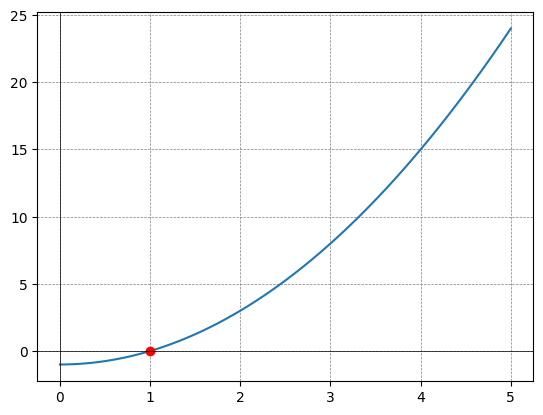

The root is:  0.9999999999854481


In [115]:
# Graficamos la funcion y su raiz
x1 = 0
x2 = 5
root = biseccion(funcion, x1, x2, print_table=True)[0]
x = np.linspace(x1, x2, 100)
y = funcion(x)
plt.plot(x, y)
plt.plot(root, funcion(root), 'ro')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()
print("The root is: ", root)

# <span style="font-size:24px;">Derivada Numerica</span>

<span style="font-size:24px;">
La derivada de una funcion $\(\LARGE f(x)\)$ en un punto $\(\LARGE x_{0}\)$ se define como:
</span>

\begin{align*}
\LARGE f'(x_{0}) &= \LARGE \lim_{h \to 0} \frac{f(x_{0} + h) - f(x_{0})}{h}
\end{align*}

In [116]:
def funcion(x):
    return (x ** 2) - 1

def funcion_derivada(x):
    return 2 * x

def deriv_f(f, x, h=1e-6):
    return (f(x + h) - f(x)) / h

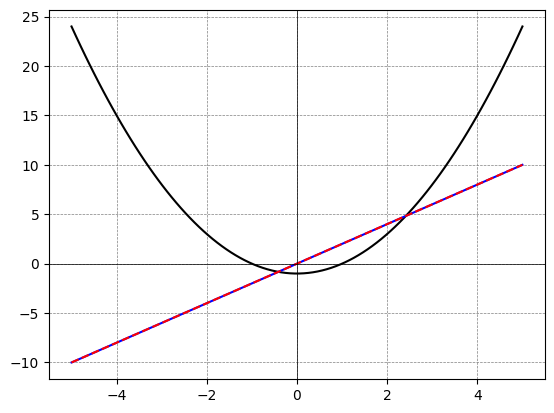

In [117]:
x = np.linspace(-5, 5, 100)
plt.plot(x, funcion(x), color = 'black')
plt.plot(x, funcion_derivada(x), color='blue')
plt.plot(x, deriv_f(funcion, x), color='red', linestyle='--')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

# <span style="font-size:24px;">Método de Newton-Raphson</span>

<span style="font-size:24px;">
El método de Newton-Raphson es un algoritmo de búsqueda de raíces que utiliza la derivada de una función para encontrar una raíz. Este método es más rápido que el método de bisección, pero no siempre converge.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>
<span style="font-size:24px;">
Para llegar a la formula del metodo de Newton-Raphson, debemos desarrollar la serie de Taylor de la funcion $\(\LARGE f(x)\)$ alrededor de un punto $\(\LARGE x_{n}\)$:
</span>

\begin{align*}
\LARGE f(x) &= \LARGE f(x_{n}) + f'(x_{n})(x - x_{n}) + \frac{f''(x_{n})}{2!}(x - x_{n})^{2} + \frac{f'''(x_{n})}{3!}(x - x_{n})^{3} + \cdots \\
\end{align*}

<span style="font-size:24px;">
Truncando la serie de Taylor en el grado 2 y evaluar en $\(\LARGE x_{n+1}\)$:
</span>

\begin{align*}
\LARGE f(x_{n+1}) &\approx \LARGE f(x_{n}) + f'(x_{n})(x_{n+1} - x_{n}) \\
\end{align*}

<span style="font-size:24px;">
Además notemos que si $\(\LARGE x_{n+1}\)$ tiende a la raiz $\(\LARGE x_{r}\)$, entonces $\(\LARGE f(x_{n+1}) \approx 0\)$, por lo que podemos reescribir la ecuacion anterior como:
</span>

\begin{align*}
\LARGE 0 &\approx \LARGE f(x_{n}) + f'(x_{n})(x_{n+1} - x_{n}) \\
\end{align*}

<span style="font-size:24px;">
De esta expresión despejamos $\(\LARGE x_{n+1}\)$, obteniendo la siguiente expresion:
</span>

\begin{align*}
\LARGE x_{n+1} &\approx \LARGE x_{n} - \frac{f(x_{n})}{f'(x_{n})} \\
\end{align*}

<span style="font-size:24px;">
La cual es la formula del metodo de Newton-Raphson.
</span>

## <span style="font-size:24px;">Algoritmo</span>
<span style="font-size:24px;">
Dada una función $\(\LARGE f(x)\)$, el método de Newton-Raphson encuentra una raíz en un punto $\(\LARGE x_{0}\)$ de la siguiente manera:
</span>

1. <span style="font-size:24px;">Se evalúa la función y su derivada en el punto inicial: $\(\LARGE f(x_{0})\)$ y $\(\LARGE f'(x_{0})\)$.</span>
2. <span style="font-size:24px;">Se calcula el siguiente punto de la siguiente manera: $\(\LARGE x_{1} = x_{0} - \frac{f(x_{0})}{f'(x_{0})}\)$.</span>
3. <span style="font-size:24px;">Se repite el proceso hasta que se encuentre una raíz con la precisión deseada.</span>

<span style="font-size:24px;">
El método de Newton-Raphson es un algoritmo de convergencia rápida, pero no siempre converge a una raíz, y puede converger a un máximo o mínimo local.
</span>


In [118]:
# Metodo de Newton-Raphson
def newton_raphson(f, f_derivada, x0, tolerancia=1e-10, max_iter=1000, print_table=False):
    for _ in range(max_iter):
        x1 = x0 - f(x0) / f_derivada(f, x0)
        if abs(x1 - x0) < tolerancia:
            return x1, _
        x0 = x1
        if print_table:
            print(_, "|", x0, "|", f(x0))
    return x1, max_iter

0 | -2.599999760314107 | 5.759998753633415
1 | -1.4923073773725248 | 1.2269813085604633
2 | -1.081205167994081 | 0.16900461529710897
3 | -1.0030494680079851 | 0.006108235271101936
4 | -1.0000046339736193 | 9.267968712256547e-06
5 | -1.0000000000084197 | 1.6839418748304524e-11


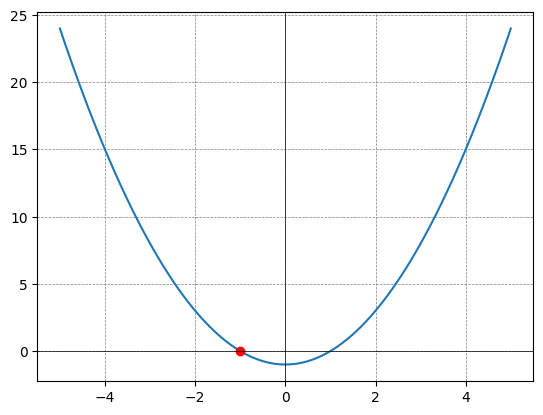

In [119]:
# Graficamos la funcion y su raiz
x1 = -5
x2 = 5
root = newton_raphson(funcion, deriv_f, x1, print_table=True)[0]
x = np.linspace(x1, x2, 100)
y = funcion(x)
plt.plot(x, y)
plt.plot(root, funcion(root), 'ro')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

# <span style="font-size:24px;">Método de la Secante</span>

<span style="font-size:24px;">
Este es una variación del metodo de Newton-Raphson, en el cual se aproxima la derivada de la funcion mediante una recta secante, en lugar de utilizar la derivada exacta, entre en el punto de estudio actual y en el de la anterior iteración, este metodo es util cuando evaluar la derivada es costoso.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La ecuación iterativa se define de la siguiente manera:
</span>

\begin{align*}
\LARGE x_{n+1} &= \LARGE x_{n} - \frac{(x_{n} - x_{n-1})}{f(x_{n}) - f(x_{n-1})} \cdot f(x_{n}) \\
\end{align*}

<span style="font-size:24px;">
Dada una función $\(\LARGE f(x)\)$, el método de la secante encuentra una raíz en un punto $\(\LARGE x_{0}\)$ de la siguiente manera:
</span>

1. <span style="font-size:24px;">Se evalúa la función en los puntos iniciales: $\(\LARGE f(x_{0})\)$ y $\(\LARGE f(x_{1})\)$.</span>
2. <span style="font-size:24px;">Se calcula el siguiente punto haciendo uso de la ecuación iterativa.</span>
3. <span style="font-size:24px;">Se repite el proceso hasta que se encuentre una raíz con la precisión deseada.</span>

<span style="font-size:24px;">
El método de la secante es un algoritmo de convergencia rápida, pero no siempre converge a una raíz, y puede converger a un máximo o mínimo local.
</span>



In [120]:
# Metodo de la Secante
def secante(f, x0, x1, tolerancia=1e-10, max_iter=1000, print_table=False):
    for _ in range(max_iter):
        x2 = x1 - ((x1 - x0) / (f(x1) - f(x0))) * f(x1)
        if abs(x2 - x1) < tolerancia:
            return x2, _
        x0 = x1
        x1 = x2
        if print_table:
            print(_, "|", x2, "|", f(x2))
    return x2, max_iter

0 | -7.0 | 48.0
1 | 17.0 | 288.0
2 | -11.8 | 138.24
3 | -38.38461538461539 | 1472.3786982248523
4 | -9.045370938074804 | 80.81873540736825
5 | -7.341412289267328 | 52.896334401005355
6 | -4.113424607539454 | 15.920262001911109
7 | -2.72359582644619 | 6.417974225835105
8 | -1.784886590777906 | 2.185820141938776
9 | -1.3000626656389007 | 0.6901629345881242
10 | -1.076343285764966 | 0.15851486881132315
11 | -1.009639670283074 | 0.01937226380931456
12 | -1.0003527948782933 | 0.0007057142208128919
13 | -1.0000016919597279 | 3.383922318578314e-06
14 | -1.0000000002984044 | 5.9680882458224e-10
15 | -1.0000000000000002 | 4.440892098500626e-16


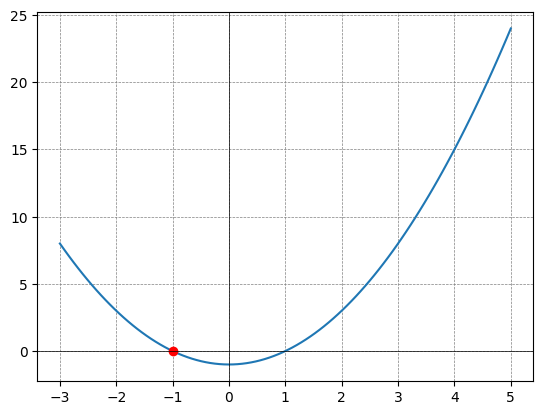

In [121]:
# Graficamos la funcion y su raiz
x1 = -3
x2 = 5
root = secante(funcion, x1, x2, print_table=True)[0]
x = np.linspace(x1, x2, 100)
y = funcion(x)
plt.plot(x, y)
plt.plot(root, funcion(root), 'ro')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

# <span style="font-size:24px;">Método de la Falsa Posición</span>

<span style="font-size:24px;">
Este es una variación del metodo de biseccion, en el cual se aproxima la funcion mediante una recta secante, en lugar de utilizar la funcion exacta, entre en el punto de estudio actual y en el de la anterior iteración, este metodo es util cuando evaluar la funcion es costoso.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La ecuación iterativa se define de la siguiente manera:
</span>

\begin{align*}
\LARGE x_{n+1} &= \LARGE x_{n} - \frac{f(x_{n})}{f(x_{n}) - f(x_{n-1})} \cdot (x_{n} - x_{n-1}) \\
\end{align*}

<span style="font-size:24px;">
Dada una función $\(\LARGE f(x)\)$, el método de la falsa posición encuentra una raíz en un intervalo $\(\LARGE [a, b]\)$ de la siguiente manera:
</span>

1. <span style="font-size:24px;">Se evalúa la función en los extremos del intervalo: $\(\LARGE f(a)\)$ y $\(\LARGE f(b)\)$.</span>
2. <span style="font-size:24px;">Se calcula el siguiente punto haciendo uso de la ecuación iterativa.</span>
3. <span style="font-size:24px;">Se repite el proceso hasta que se encuentre una raíz con la precisión deseada.</span>

<span style="font-size:24px;">
El método de la falsa posición es un algoritmo de convergencia rápida, pero no siempre converge a una raíz, y puede converger a un máximo o mínimo local.
</span>


In [122]:
def falsa_posicion(f, a, b, tolerancia=1e-6, max_iter=1000, print_table=False):
    if f(a) * f(b) >= 0:
        print("El método de la falsa posición falló.")
        return None
    for i in range(max_iter):
        c = a - f(a) * (b - a) / (f(b) - f(a))
        if abs(f(c)) < tolerancia:
            return c, i
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        if print_table:
            print(f"Iteración {i}: a = {a}, b = {b}, c = {c}, f(c) = {f(c)}")
    print("Se alcanzó el máximo número de iteraciones.")
    return c, max_iter


Iteración 0: a = 0.2, b = 5, c = 0.2, f(c) = -0.96
Iteración 1: a = 0.3846153846153846, b = 5, c = 0.3846153846153846, f(c) = -0.8520710059171598
Iteración 2: a = 0.5428571428571428, b = 5, c = 0.5428571428571428, f(c) = -0.7053061224489796
Iteración 3: a = 0.6701030927835051, b = 5, c = 0.6701030927835051, f(c) = -0.5509618450419811
Iteración 4: a = 0.7672727272727272, b = 5, c = 0.7672727272727272, f(c) = -0.4112925619834712
Iteración 5: a = 0.8385876418663304, b = 5, c = 0.8385876418663304, f(c) = -0.29677076690906723
Iteración 6: a = 0.8894168466522678, b = 5, c = 0.8894168466522678, f(c) = -0.2089376728911363
Iteración 7: a = 0.9248936482323603, b = 5, c = 0.9248936482323603, f(c) = -0.1445717394594349
Iteración 8: a = 0.9492943797969795, b = 5, c = 0.9492943797969795, f(c) = -0.09884018048586807
Iteración 9: a = 0.9659081450901403, b = 5, c = 0.9659081450901403, f(c) = -0.06702145524852443
Iteración 10: a = 0.9771422193699602, b = 5, c = 0.9771422193699602, f(c) = -0.045193083124

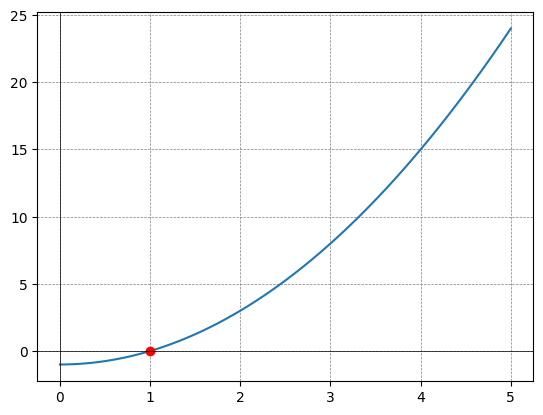

In [123]:
# Graficamos la funcion y su raiz
x1 = 0
x2 = 5
root = falsa_posicion(funcion, x1, x2, print_table=True)[0]
x = np.linspace(x1, x2, 100)
y = funcion(x)
plt.plot(x, y)
plt.plot(root, funcion(root), 'ro')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

# <span style="font-size:24px;">Interpolación y Aproximación</span>

<span style="font-size:24px;">
La interpolación es un método de aproximación de una función a partir de un conjunto de puntos discretos. Este método se utiliza para aproximar funciones que no pueden ser evaluadas directamente, o para simplificar la evaluación de funciones complejas.
</span>

<span style="font-size:24px;">
En esta seccion estudiaremos los metodos de Interpolacion Lineal, Interpolacion Cuadratica, Interpolacion de Lagrange y Interpolacion de Newton.
</span>

# <span style="font-size:24px;">Interpolación Lineal</span>

<span style="font-size:24px;">
La interpolación lineal es un método de interpolación que se utiliza para trazar una recta entre dos puntos conocidos de una función, siendo un caso particular de la interpolación general de Newton.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La ecuación de la interpolación lineal para dos puntos $\LARGE \((x_{1}, y_{1})\)$ y $\LARGE \((x_{2}, y_{2})\)$ es:
</span>

$$
\LARGE y = \LARGE \frac{(x - x_{1})}{(x_{2} - x_{1})} \cdot (y_{2} - y_{1}) + y_{1}
$$

<span style="font-size:24px;">
Esta fórmula, derivada de la semejanza de triángulos, se utiliza para calcular valores intermedios en una recta que pasa por estos dos puntos.
</span>


In [124]:
def interpolacion_lineal(f, x1, x2):
    y1 = f(x1)
    y2 = f(x2)
    return lambda x: y1 + ((x - x1)/(x2 - x1)) * (y2 - y1)

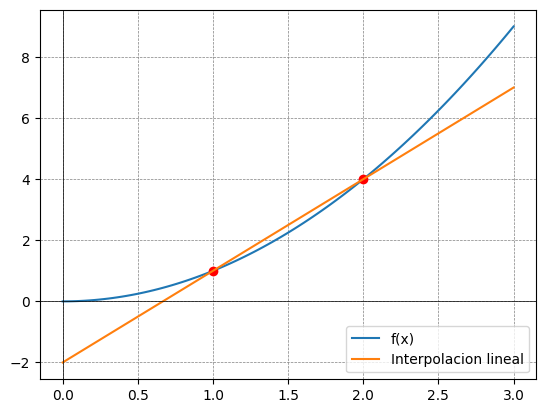

In [125]:
f = lambda x: x**2
x0 = 1
x1 = 2
x = np.linspace(0, 3, 100)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.plot(x0, f(x0), 'ro')
plt.plot(x1, f(x1), 'ro')
plt.plot(x, interpolacion_lineal(f, x0, x1)(x), label='Interpolacion lineal')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# <span style="font-size:24px;">Interpolación Cuadrática</span>

<span style="font-size:24px;">
La interpolación cuadrática es un método de interpolación que aproxima una función a partir de tres puntos. Este método es más preciso que la interpolación lineal, pero no siempre es el más preciso.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La interpolación cuadrática se basa en un polinomio de segundo grado para aproximar una función a partir de tres puntos dados. La ecuación general del polinomio cuadrático es:
</span>

$$
\LARGE y = \LARGE a x^2 + b x + c
$$

<span style="font-size:24px;">
Los coeficientes $\LARGE \( a \)$, $\LARGE \( b \)$, y $\LARGE \( c \)$ se determinan resolviendo el sistema de ecuaciones lineales formado por los tres puntos $\LARGE \((x_0, y_0)\)$, $\LARGE \((x_1, y_1)\)$, y $\LARGE \((x_2, y_2)\)$. Las fórmulas para calcular estos coeficientes son:
</span>

$$
\LARGE a = \frac{y_0 (x_1 - x_2) + y_1 (x_2 - x_0) + y_2 (x_0 - x_1)}{(x_0 - x_1) (x_0 - x_2) (x_1 - x_2)}
$$
$$
\LARGE b = \frac{y_0 (x_1^2 - x_2^2) + y_1 (x_2^2 - x_0^2) + y_2 (x_0^2 - x_1^2)}{(x_0 - x_1) (x_0 - x_2) (x_1 - x_2)}
$$
$$
\LARGE c = \frac{y_0 x_1 x_2 (x_1 - x_2) + y_1 x_0 x_2 (x_2 - x_0) + y_2 x_0 x_1 (x_0 - x_1)}{(x_0 - x_1) (x_0 - x_2) (x_1 - x_2)}
$$



In [126]:
def interpolacion_cuadratica(f, x0, x1, x2):
    y0 = f(x0)
    y1 = f(x1)
    y2 = f(x2)

    # Coeficientes del polinomio cuadrático
    a = (y2 - (x2 * (y1 - y0) + x1 * y0 - x0 * y1) / (x1 - x0)) / (x2 * (x2 - x1 - x0) + x1 * x0)
    b = (y1 - y0) / (x1 - x0) - a * (x1 + x0)
    c = (x1 * y0 - x0 * y1) / (x1 - x0) + a * x0 * x1

    return lambda x: a * x**2 + b * x + c


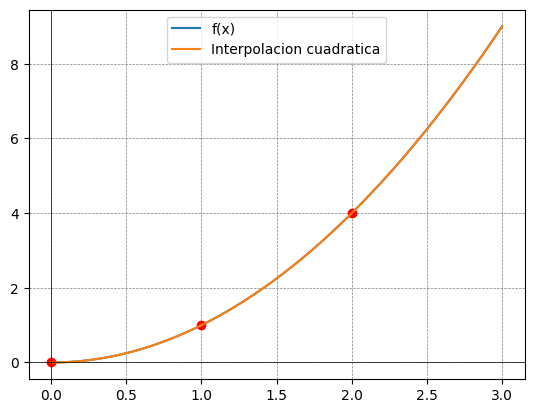

In [127]:
f = lambda x: x**2
x0 = 0
x1 = 1
x2 = 2
x = np.linspace(0, 3, 100)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.plot(x0, f(x0), 'ro')
plt.plot(x1, f(x1), 'ro')
plt.plot(x2, f(x2), 'ro')
plt.plot(x, interpolacion_cuadratica(f, x0, x1, x2)(x), label='Interpolacion cuadratica')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# <span style="font-size:24px;">Interpolación de Lagrange</span>

<span style="font-size:24px;">
La interpolación de Lagrange es un método de interpolación que aproxima una función a partir de un conjunto de puntos. Este método es más preciso que la interpolación lineal y cuadrática, pero no siempre es el más preciso.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
Supongamos que tienes un conjunto de $\LARGE n+1 $ puntos de datos:
</span>

$$
\LARGE
\((x_{0}, y_{0}\)), \((x_{1}, y_{1}\)), \((x_{2}, y_{2}\)), \cdots, \((x_{n}, y_{n}\))
$$

<span style="font-size:24px;">
Donde cada $\LARGE y_{i} = f(x_{i})$ es el valor de la función $\LARGE f(x)$ en el punto $\LARGE x_{i}$.
</span>

<span style="font-size:24px;">
La idea es construir un polinomio de grando n que pase exactamente por estos n+1 puntos. Este polinomio se expresa como:
</span>

$$
\LARGE L(x) = \LARGE \sum_{i=0}^{n} y_{i} \cdot l_{i}(x)
$$

<span style="font-size:24px;">
Donde cada $\LARGE l_{i}(x)$ es un polinomio de Lagrange de base, y se define como:
</span>

$$
\LARGE l_{i}(x) = \LARGE \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_{j}}{x_{i} - x_{j}}
$$

<span style="font-size:24px;">
Lo notable de estos polinimios es que $\LARGE l_{i}(x)$ es igual a 1 en $\LARGE x = x_{i}$ y 0 en todos los demás puntos $\LARGE x_{j} (j \neq i)$.

In [128]:
def lagrange_interpolation(x_points, y_points, x):
    total = 0
    n = len(x_points)
    for i in range(n):
        xi, yi = x_points[i], y_points[i]
        term = yi
        for j in range(n):
            if j != i:
                term = term * (x - x_points[j]) / (xi - x_points[j])
        total += term
    return total

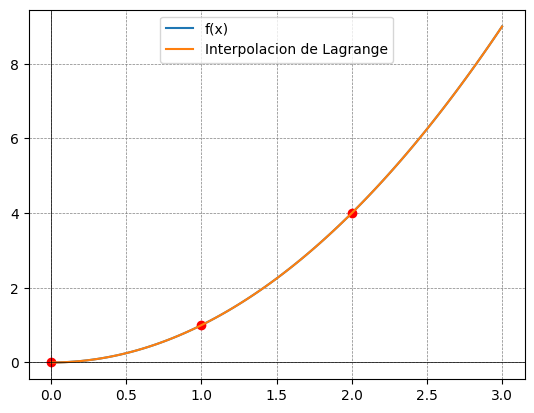

In [129]:
f = lambda x: x**2
x_points = [0, 1, 2]
y_points = [f(x) for x in x_points]
x = np.linspace(0, 3, 100)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.plot(x_points, y_points, 'ro')
plt.plot(x, lagrange_interpolation(x_points, y_points, x), label='Interpolacion de Lagrange')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# <span style="font-size:24px;">Interpolación de Newton</span>

<span style="font-size:24px;">
La interpolación de Newton es un método de interpolación que aproxima una función a partir de un conjunto dado de puntos. A diferencia de la interpolación de Lagrange, este método utiliza diferencias divididas para aproximar la función.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
Supongamos que tienes un conjunto de $\LARGE n+1 $ puntos de datos, donde cada $\LARGE y_{i} = f(x_{i})$ es el valor de la función $\LARGE f(x)$ en el punto $\LARGE x_{i}$
</span>

$$
\LARGE
\((x_{0}, y_{0}\)), \((x_{1}, y_{1}\)), \((x_{2}, y_{2}\)), \cdots, \((x_{n}, y_{n}\))
$$

<span style="font-size:24px;">
En estos puntos deberemos calcular las diferencias divididas, estas esencialmente son la pendiente entre los puntos, las cuales se definen de la siguiente manera:
</span>

$$
\LARGE f[x_{i}, x_{i+1}] = \LARGE \frac{f(x_{i+1}) - f(x_{i})}{x_{i+1} - x_{i}}
$$

<span style="font-size:24px;">
Una vez calculadas las diferencias divididas, podemos construir el polinomio de Newton, el cual se define como:
</span>

$$
\LARGE P(x) = f[x_0] + \sum_{k=1}^{n} \left( f[x_0, x_1, \ldots, x_k] \prod_{i=0}^{k-1} (x - x_i) \right)
$$

<span style="font-size:24px;">
Donde $\LARGE f[x_0, x_1, \ldots, x_k]$ es la k-ésima diferencia dividida.
</span>

<span style="font-size:24px;">
Ahora veamos la implementacion en python.
</span>

In [130]:
def diferencias_divididas(x_points, y_points):
    n = len(x_points)
    coef = y_points.copy()
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i - 1]) / (x_points[i] - x_points[i - j])
    return coef

In [131]:
def interpolacion_newton(x_points, y_points, x):
    coef = diferencias_divididas(x_points, y_points)
    n = len(x_points) - 1
    polinomio = coef[n]
    for k in range(1, n + 1):
        polinomio = polinomio * (x - x_points[n - k]) + coef[n - k]
    return polinomio

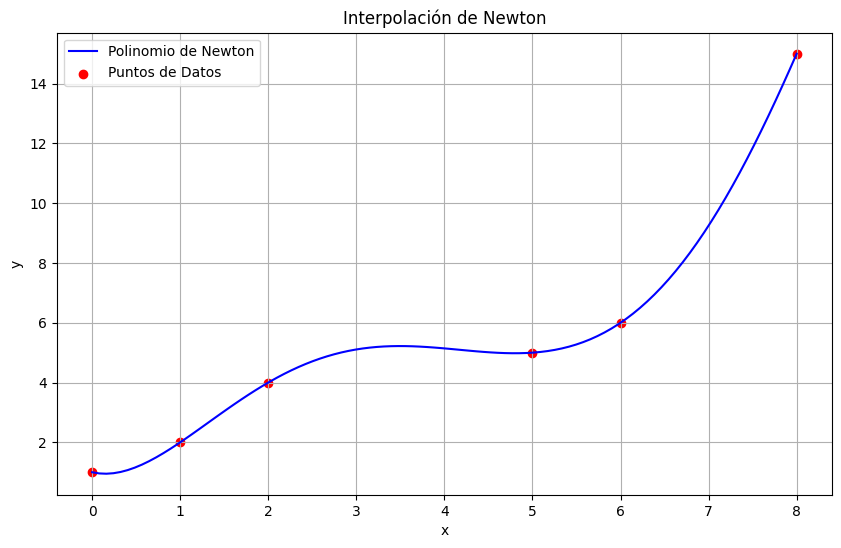

In [132]:
x_data = [0, 1, 2, 5, 6, 8]
y_data = [1, 2, 4, 5, 6, 15]

# Generar puntos x para la gráfica
x_points = np.linspace(min(x_data), max(x_data), 100)
# Calcular y para cada punto x usando el polinomio de Newton
y_points = [interpolacion_newton(x_data, y_data, x) for x in x_points]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, label='Polinomio de Newton', color='blue')  # Polinomio de interpolación
plt.scatter(x_data, y_data, color='red', label='Puntos de Datos')        # Puntos de datos originales

# Etiquetas y leyendas
plt.title('Interpolación de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# <span style="font-size:24px;">Diferenciación Numérica</span>

<span style="font-size:24px;">
La derivada de una funcion $\(\LARGE f(x)\)$ en un punto $\(\LARGE x_{0}\)$ se define como:
</span>

\begin{align*}
\LARGE f'(x_{0}) &= \LARGE \lim_{h \to 0} \frac{f(x_{0} + h) - f(x_{0})}{h}
\end{align*}

<span style="font-size:24px;">
Sin embargo, en la práctica, no podemos tomar el límite cuando $\(\LARGE h \to 0\)$, por lo que debemos aproximar la derivada con un valor pequeño de $\(\LARGE h\)$.
</span>

<span style="font-size:24px;">
Existen varias formas de aproximar la derivada de una función, en esta seccion estudiaremos los metodos de La Diferencia Centrada, Diferencia Hacia Adelante y Diferencia Hacia Atras.
</span>

# <span style="font-size:24px;">Diferencia Hacia Adelante </span>

<span style="font-size:24px;">
La diferencia hacia adelante es un método de diferenciación numérica que aproxima la derivada de una función en un punto dado utilizando la diferencia entre la función evaluada en ese punto y la función evaluada en un punto cercano a la derecha. Esta definicion de diferenciación, es la que usamos más comunmente.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La diferencia hacia adelante se define de la siguiente manera:
</span>

\begin{align*}
\LARGE f'(x_{0}) &= \LARGE \frac{f(x_{0} + h) - f(x_{0})}{h}
\end{align*}

<span style="font-size:24px;">
Donde $\(\LARGE h\)$ es un valor pequeño.
</span>

# <span style="font-size:24px;">Diferencia Hacia Atras </span>

<span style="font-size:24px;">
La diferencia hacia atrás es un método de diferenciación numérica que aproxima la derivada de una función en un punto dado utilizando la diferencia entre la función evaluada en ese punto y la función evaluada en un punto cercano a la izquierda.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La diferencia hacia atrás se define de la siguiente manera:
</span>

\begin{align*}
\LARGE f'(x_{0}) &= \LARGE \frac{f(x_{0}) - f(x_{0} - h)}{h}
\end{align*}

<span style="font-size:24px;">
Donde $\(\LARGE h\)$ es un valor pequeño.
</span>

# <span style="font-size:24px;">Diferencia Centrada </span>

<span style="font-size:24px;">
La diferencia centrada es un método de diferenciación numérica que aproxima la derivada de una función en un punto dado utilizando la diferencia entre la función evaluada en ese punto y la función evaluada en un punto cercano a la izquierda y a la derecha (centrado).
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La diferencia centrada se define de la siguiente manera:
</span>

\begin{align*}
\LARGE f'(x_{0}) &= \LARGE \frac{f(x_{0} + h) - f(x_{0} - h)}{2h}
\end{align*}

<span style="font-size:24px;">
Donde $\(\LARGE h\)$ es un valor pequeño.
</span>




In [133]:
def diferencia_hacia_adelante(f, x0, h=1e-6):
    return (f(x0 + h) - f(x0)) / h

def diferencia_hacia_atras(f, x0, h=1e-6):
    return (f(x0) - f(x0 - h)) / h

def diferencia_centrada(f, x0, h=1e-6):
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

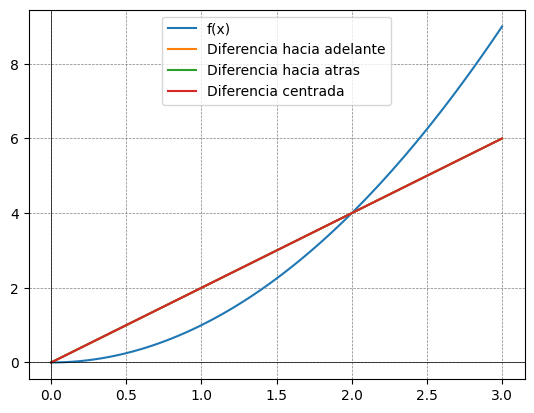

In [134]:
f = lambda x: x**2
x = np.linspace(0, 3, 100)
y = f(x)
plt.plot(x, y, label='f(x)')
plt.plot(x, diferencia_hacia_adelante(f, x), label='Diferencia hacia adelante')
plt.plot(x, diferencia_hacia_atras(f, x), label='Diferencia hacia atras')
plt.plot(x, diferencia_centrada(f, x), label='Diferencia centrada')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# <span style="font-size:24px;">Integración Numérica</span>

<span style="font-size:24px;">
La integral de una funcion $\(\LARGE f(x)\)$ en un intervalo $\(\LARGE [a, b]\)$ se define como:
</span>

\begin{align*}
\LARGE \int_{a}^{b} f(x) dx &= \LARGE \lim_{n \to \infty} \sum_{i=1}^{n} f(x_{i}) \Delta x
\end{align*}

<span style="font-size:24px;">
Sin embargo, en la práctica, no podemos tomar el límite cuando $\(\LARGE n \to \infty\)$, por lo que debemos aproximar la integral con un valor grande de $\(\LARGE n\)$.
</span>

<span style="font-size:24px;">
Existen varias formas de aproximar la integral de una función, en esta seccion estudiaremos los metodos de Regla del Rectangulo, Regla del Trapecio, Regla de Simpson y Regla de Simpson 3/8, asi como sus metodos compuestos.
</span>

![IntegralRiemann](images/integralriemann.jpg)

# <span style="font-size:24px;">Regla del Rectangulo</span>

<span style="font-size:24px;">
La regla del rectangulo es un método de integración numérica que aproxima la integral de una función en un intervalo dado como el área bajo el gráfico de la función, utilizando rectangulos para aproximar el área bajo la curva.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La regla del rectangulo se define de la siguiente manera:
</span>

\begin{align*}
\LARGE \int_{a}^{b} f(x) dx &= \LARGE (b - a) \cdot f(a)
\end{align*}

<span style="font-size:24px;">
Donde $\(\LARGE a\)$ y $\(\LARGE b\)$ son los extremos del intervalo.
</span>



In [143]:
def regla_rectangulo(f, a, b):
    return (b - a) * f(a)

def regla_rectangulo_midpoint(f, a, b):
    return (b - a) * f((a + b) / 2)

f = lambda x: x

a = 0
b = 3

print(f"El area bajo la curva es: {regla_rectangulo(f, a, b)}")
print(f"El area bajo la curva es: {regla_rectangulo_midpoint(f, a, b)}")


El area bajo la curva es: 0
El area bajo la curva es: 4.5


# <span style="font-size:24px;">Regla del Trapecio</span>

<span style="font-size:24px;">
La regla del trapecio es un método de integración numérica que aproxima la integral de una función en un intervalo dado como el área bajo el gráfico de la función, utilizando trapecios para aproximar el área bajo la curva.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La regla del trapecio se define de la siguiente manera:
</span>

\begin{align*}
\LARGE \int_{a}^{b} f(x) dx &= \LARGE \frac{b - a}{2} \cdot (f(a) + f(b))
\end{align*}

<span style="font-size:24px;">
Donde $\(\LARGE a\)$ y $\(\LARGE b\)$ son los extremos del intervalo.
</span>



In [144]:
def regla_trapecio(f, a, b):
    return ((b - a) / 2) * (f(a) + f(b))

In [145]:
f = lambda x: x
a = 0
b = 3
print(f"El area bajo la curva es: {regla_trapecio(f, a, b)}")

El area bajo la curva es: 4.5


# <span style="font-size:24px;">Regla del Trapecio Compuesta</span>

<span style="font-size:24px;">
La regla del trapecio compuesta es un método de integración numérica que aproxima la integral de una función en un intervalo dado como el área bajo el gráfico de la función, utilizando trapecios para aproximar el área bajo la curva.
</span>

## <span style="font-size:24px;">Formulación Matemática</span>

<span style="font-size:24px;">
La regla del trapecio compuesta se define de la siguiente manera:
</span>

\begin{align*}
\LARGE \int_{a}^{b} f(x) dx &= \LARGE \frac{h}{2} \cdot \sum_{i=1}^{n} (f(x_{i-1}) + f(x_{i}))
\end{align*}

<span style="font-size:24px;">
Donde $\(\LARGE h = \frac{b - a}{n}\)$, $\(\LARGE a = x_{0}\)$, $\(\LARGE b = x_{n}\)$ y $\(\LARGE x_{i} = a + i \cdot h\)$.
</span>


In [146]:
def regla_trapecio_compuesta(f, a, b, n):
    h = (b - a) / n
    total = 0
    for i in range(1, n):
        total += f(a + i * h)
    return (h / 2) * (f(a) + f(b) + 2 * total)

In [147]:
f = lambda x: x**2
a = 0
b = 3
n = 100
print(f"El area bajo la curva es: {regla_trapecio_compuesta(f, a, b, n)}")

El area bajo la curva es: 9.000449999999994
